In [10]:
import os, glob
current_location = os.getcwd()
os.chdir(current_location)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

## Problem-1:

An automated answer-rating site marks each post in a community forum website as “good” or “bad” based on the quality of the post. The CSV file, which you can download here, contains the various types of quality as measured by the tool. Following are the type of qualities that the dataset contains:

i. num_words: number of words in the post  
ii. num_characters: number of characters in the post  
iii. num_misspelled: number of misspelled words  
iv. bin_end_qmark: if the post ends with a question mark  
v. num_interrogative: number of interrogative words in the post  
vi. bin_start_small: if the answer starts with a lowercase letter. (‘1’ means yes, otherwise no)  
vii. num_sentences: number of sentences per post  
viii. num_punctuations: number of punctuation symbols in the post  
ix. label: the label of the post (‘G’ for good and ‘B’ for bad) as determined by the tool.  

Create a logistics regression model to predict the class label from the first eight attributes of the question set.  Then try doing the same using two different subsets of those eight attributes. Report the accuracies of each of these three models. [5 points]


In [11]:
df_quality = pd.read_csv("quality.csv")
df_quality.head()

,S.No.,num_words,num_characters,num_misspelled,bin_end_qmark,num_interrogative,bin_start_small,num_sentences,num_punctuations,label
0,1,10,48,2,0,0,0,2,4,B
1,2,8,25,0,0,0,1,1,0,B
2,3,20,81,0,1,19,0,1,1,B
3,4,9,34,1,0,1,0,1,2,B
4,5,18,69,3,0,1,0,1,0,B


In [15]:
def manipulate_logit_func(X, y, iterations):
    i_list = []
    acc_record = []

    for i in range(iterations):
        #Creating X and Y for training and testing
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

        #Creating Logisitic Regression model
        model = LogisticRegression()
        model.fit(X_train,y_train)

        #Predicting on Test set
        predictions = model.predict(X_test)

        accuracy = accuracy_score(y_test,predictions)
        print("iteration:", i)
        print(accuracy)
        print(confusion_matrix(y_test,predictions))
        print(classification_report(y_test, predictions))

        i_list.append(i)
        acc_record.append(accuracy)
        
    return(i_list, acc_record)

#### model 1 - first eight attributes

In [16]:
X = df_quality.iloc[:,1:9]
#y = df_quality.iloc[:,-1]
y = np.where(df_quality['label'] == 'B', 0, 1)

i_list, acc_record = manipulate_logit_func(X, y, 100)

iteration: 0
0.6666666666666666
[[3 2]
 [1 3]]
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.60      0.75      0.67         4

    accuracy                           0.67         9
   macro avg       0.68      0.68      0.67         9
weighted avg       0.68      0.67      0.67         9

iteration: 1
0.6666666666666666
[[3 2]
 [1 3]]
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.60      0.75      0.67         4

    accuracy                           0.67         9
   macro avg       0.68      0.68      0.67         9
weighted avg       0.68      0.67      0.67         9

iteration: 2
0.8888888888888888
[[4 0]
 [1 4]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.80      0.89         5

    accuracy                           0.


iteration: 29
0.6666666666666666
[[2 2]
 [1 4]]
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.67      0.80      0.73         5

    accuracy                           0.67         9
   macro avg       0.67      0.65      0.65         9
weighted avg       0.67      0.67      0.66         9

iteration: 30
0.7777777777777778
[[3 2]
 [0 4]]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.67      1.00      0.80         4

    accuracy                           0.78         9
   macro avg       0.83      0.80      0.77         9
weighted avg       0.85      0.78      0.77         9

iteration: 31
0.7777777777777778
[[5 1]
 [1 2]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.67      0.67      0.67         3

    accuracy                         

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.50      0.67      0.57         3

    accuracy                           0.67         9
   macro avg       0.65      0.67      0.65         9
weighted avg       0.70      0.67      0.68         9

iteration: 57
1.0
[[4 0]
 [0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

iteration: 58
0.6666666666666666
[[2 2]
 [1 4]]
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.67      0.80      0.73         5

    accuracy                           0.67         9
   macro avg       0.67      0.65      0.65    

iteration: 85
0.5555555555555556
[[1 4]
 [0 4]]
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.50      1.00      0.67         4

    accuracy                           0.56         9
   macro avg       0.75      0.60      0.50         9
weighted avg       0.78      0.56      0.48         9

iteration: 86
0.6666666666666666
[[2 0]
 [3 4]]
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       1.00      0.57      0.73         7

    accuracy                           0.67         9
   macro avg       0.70      0.79      0.65         9
weighted avg       0.87      0.67      0.69         9

iteration: 87
0.5555555555555556
[[4 4]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.20      1.00      0.33         1

    accuracy                          

No handles with labels found to put in legend.


average accuracy: 0.6644444444444444


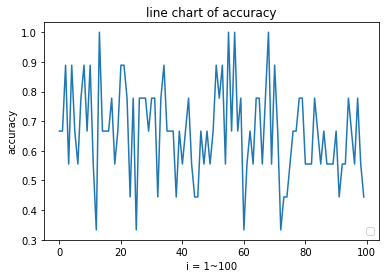

In [17]:
# Plot of accuracy
plt.plot(i_list, acc_record)
#plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])
plt.xlabel('i = 1~100')
plt.ylabel('accuracy')
plt.title('line chart of accuracy')
plt.legend(loc="lower right")

print("average accuracy:", sum(acc_record) / len(acc_record) )

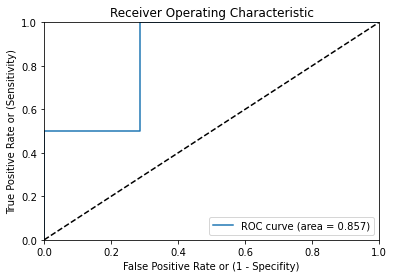

In [14]:
'''
# Compute fpr, tpr, thresholds and roc auc
y_score = model.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test,y_score)
roc_auc = roc_auc_score(y_test,y_score)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
'''

#### model 2&3 - the subset of first eight attributes

In [20]:
X = df_quality.iloc[:,[2,5,6]]
y = df_quality.iloc[:,-1]

i_list, acc_record = manipulate_logit_func(X, y, 100)

iteration: 0
0.5555555555555556
[[3 2]
 [2 2]]
              precision    recall  f1-score   support

           B       0.60      0.60      0.60         5
           G       0.50      0.50      0.50         4

    accuracy                           0.56         9
   macro avg       0.55      0.55      0.55         9
weighted avg       0.56      0.56      0.56         9

iteration: 1
0.5555555555555556
[[3 3]
 [1 2]]
              precision    recall  f1-score   support

           B       0.75      0.50      0.60         6
           G       0.40      0.67      0.50         3

    accuracy                           0.56         9
   macro avg       0.57      0.58      0.55         9
weighted avg       0.63      0.56      0.57         9

iteration: 2
0.6666666666666666
[[3 2]
 [1 3]]
              precision    recall  f1-score   support

           B       0.75      0.60      0.67         5
           G       0.60      0.75      0.67         4

    accuracy                           0.


iteration: 30
0.5555555555555556
[[4 2]
 [2 1]]
              precision    recall  f1-score   support

           B       0.67      0.67      0.67         6
           G       0.33      0.33      0.33         3

    accuracy                           0.56         9
   macro avg       0.50      0.50      0.50         9
weighted avg       0.56      0.56      0.56         9

iteration: 31
0.6666666666666666
[[3 2]
 [1 3]]
              precision    recall  f1-score   support

           B       0.75      0.60      0.67         5
           G       0.60      0.75      0.67         4

    accuracy                           0.67         9
   macro avg       0.68      0.68      0.67         9
weighted avg       0.68      0.67      0.67         9

iteration: 32
0.6666666666666666
[[2 2]
 [1 4]]
              precision    recall  f1-score   support

           B       0.67      0.50      0.57         4
           G       0.67      0.80      0.73         5

    accuracy                         


iteration: 59
0.6666666666666666
[[3 2]
 [1 3]]
              precision    recall  f1-score   support

           B       0.75      0.60      0.67         5
           G       0.60      0.75      0.67         4

    accuracy                           0.67         9
   macro avg       0.68      0.68      0.67         9
weighted avg       0.68      0.67      0.67         9

iteration: 60
0.5555555555555556
[[2 2]
 [2 3]]
              precision    recall  f1-score   support

           B       0.50      0.50      0.50         4
           G       0.60      0.60      0.60         5

    accuracy                           0.56         9
   macro avg       0.55      0.55      0.55         9
weighted avg       0.56      0.56      0.56         9

iteration: 61
0.6666666666666666
[[1 3]
 [0 5]]
              precision    recall  f1-score   support

           B       1.00      0.25      0.40         4
           G       0.62      1.00      0.77         5

    accuracy                         

iteration: 88
0.6666666666666666
[[3 1]
 [2 3]]
              precision    recall  f1-score   support

           B       0.60      0.75      0.67         4
           G       0.75      0.60      0.67         5

    accuracy                           0.67         9
   macro avg       0.68      0.68      0.67         9
weighted avg       0.68      0.67      0.67         9

iteration: 89
0.3333333333333333
[[0 6]
 [0 3]]
              precision    recall  f1-score   support

           B       0.00      0.00      0.00         6
           G       0.33      1.00      0.50         3

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9

iteration: 90
0.6666666666666666
[[3 0]
 [3 3]]
              precision    recall  f1-score   support

           B       0.50      1.00      0.67         3
           G       1.00      0.50      0.67         6

    accuracy                          

No handles with labels found to put in legend.


average accuracy: 0.6211111111111112


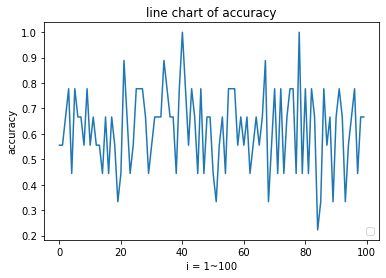

In [21]:
# Plot of accuracy
plt.plot(i_list, acc_record)
#plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])
plt.xlabel('i = 1~100')
plt.ylabel('accuracy')
plt.title('line chart of accuracy')
plt.legend(loc="lower right")

print("average accuracy:", sum(acc_record) / len(acc_record) )


## Problem-2:

Download the wine dataset. It contains information about a number of wines -- their characteristics (features) and if it's considered high quality or not (1 or 0). First, do some experiments (trial-and-error) to figure out a good subset of features to use for learning wine quality (last column). Report these features.

Then, use 70% data for training to build a kNN classifier with different values of k ranging from 2 to 10. Plot your accuracies with each of these. In other words, your final result will be a line chart with k on the x-axis and accuracy on the y-axis. [5 points]

In [6]:
df_wine = pd.read_csv("wine.csv")
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


In [44]:
df_wine["high_quality"] = df_wine["high_quality"].astype(int)

In [104]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
df_wine["color"] = le.fit_transform(df_wine["color"])

In [105]:
df_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'is_red',
       'high_quality', 'color_1'],
      dtype='object')

In [106]:
#Making X and Y for training and testing
use_columns = ['fixed_acidity', 
               'volatile_acidity', 
               'citric_acid', 
               'residual_sugar',
               'chlorides', 
               'free_sulfur_dioxide', 
               'total_sulfur_dioxide', 
               'density',
               'pH', 
               'sulphates', 
               'alcohol', 
               'quality',
               'color',
               'is_red'
              ]
X = df_wine[use_columns]
y = df_wine["high_quality"]

#Normalizing the data 
#X_normalized = X.apply(lambda x: (x -min(x))/(max(x)-min(x)))

#Creating train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30)

k_list = []
acc_record = []
for k in range(2, 11):
    #Creating KNN Classfier model
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fitting the training data
    knn.fit(X_train,y_train)

    #Predicting on the test data
    predictions = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test,predictions)
    print("k=", k)
    #Printing Confusion matrix and accuracy socres 
    print(confusion_matrix(y_test,predictions))
    print(accuracy)
    
    k_list.append(k)
    acc_record.append(accuracy)

k= 2
[[1537   52]
 [ 213  148]]
0.8641025641025641
k= 3
[[1478  111]
 [ 160  201]]
0.861025641025641
k= 4
[[1525   64]
 [ 223  138]]
0.8528205128205129
k= 5
[[1490   99]
 [ 182  179]]
0.8558974358974359
k= 6
[[1524   65]
 [ 244  117]]
0.8415384615384616
k= 7
[[1497   92]
 [ 215  146]]
0.8425641025641025
k= 8
[[1539   50]
 [ 268   93]]
0.8369230769230769
k= 9
[[1520   69]
 [ 240  121]]
0.8415384615384616
k= 10
[[1549   40]
 [ 276   85]]
0.837948717948718


No handles with labels found to put in legend.


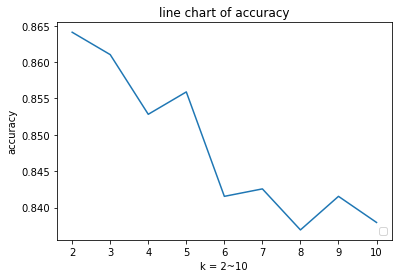

In [107]:
# Plot of accuracy
plt.plot(k_list, acc_record)
#plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])
plt.xlabel('k = 2~10')
plt.ylabel('accuracy')
plt.title('line chart of accuracy')
plt.legend(loc="lower right")